# Utilities

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import xarray as xr

fontsize=16
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['axes.labelsize']= 'x-large'
mpl.rcParams['figure.facecolor']='white'
mpl.rcParams['text.latex.preamble']= r'\usepackage{amsmath}'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']) 

In [6]:
datasets= ['HadISST','ERSSTv5','HadCRUT5','HadSST4']
keys = ['sst','sst','tas_mean','tos']
key_dict=dict(zip(datasets, keys))


In [7]:
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']

# Figure 5

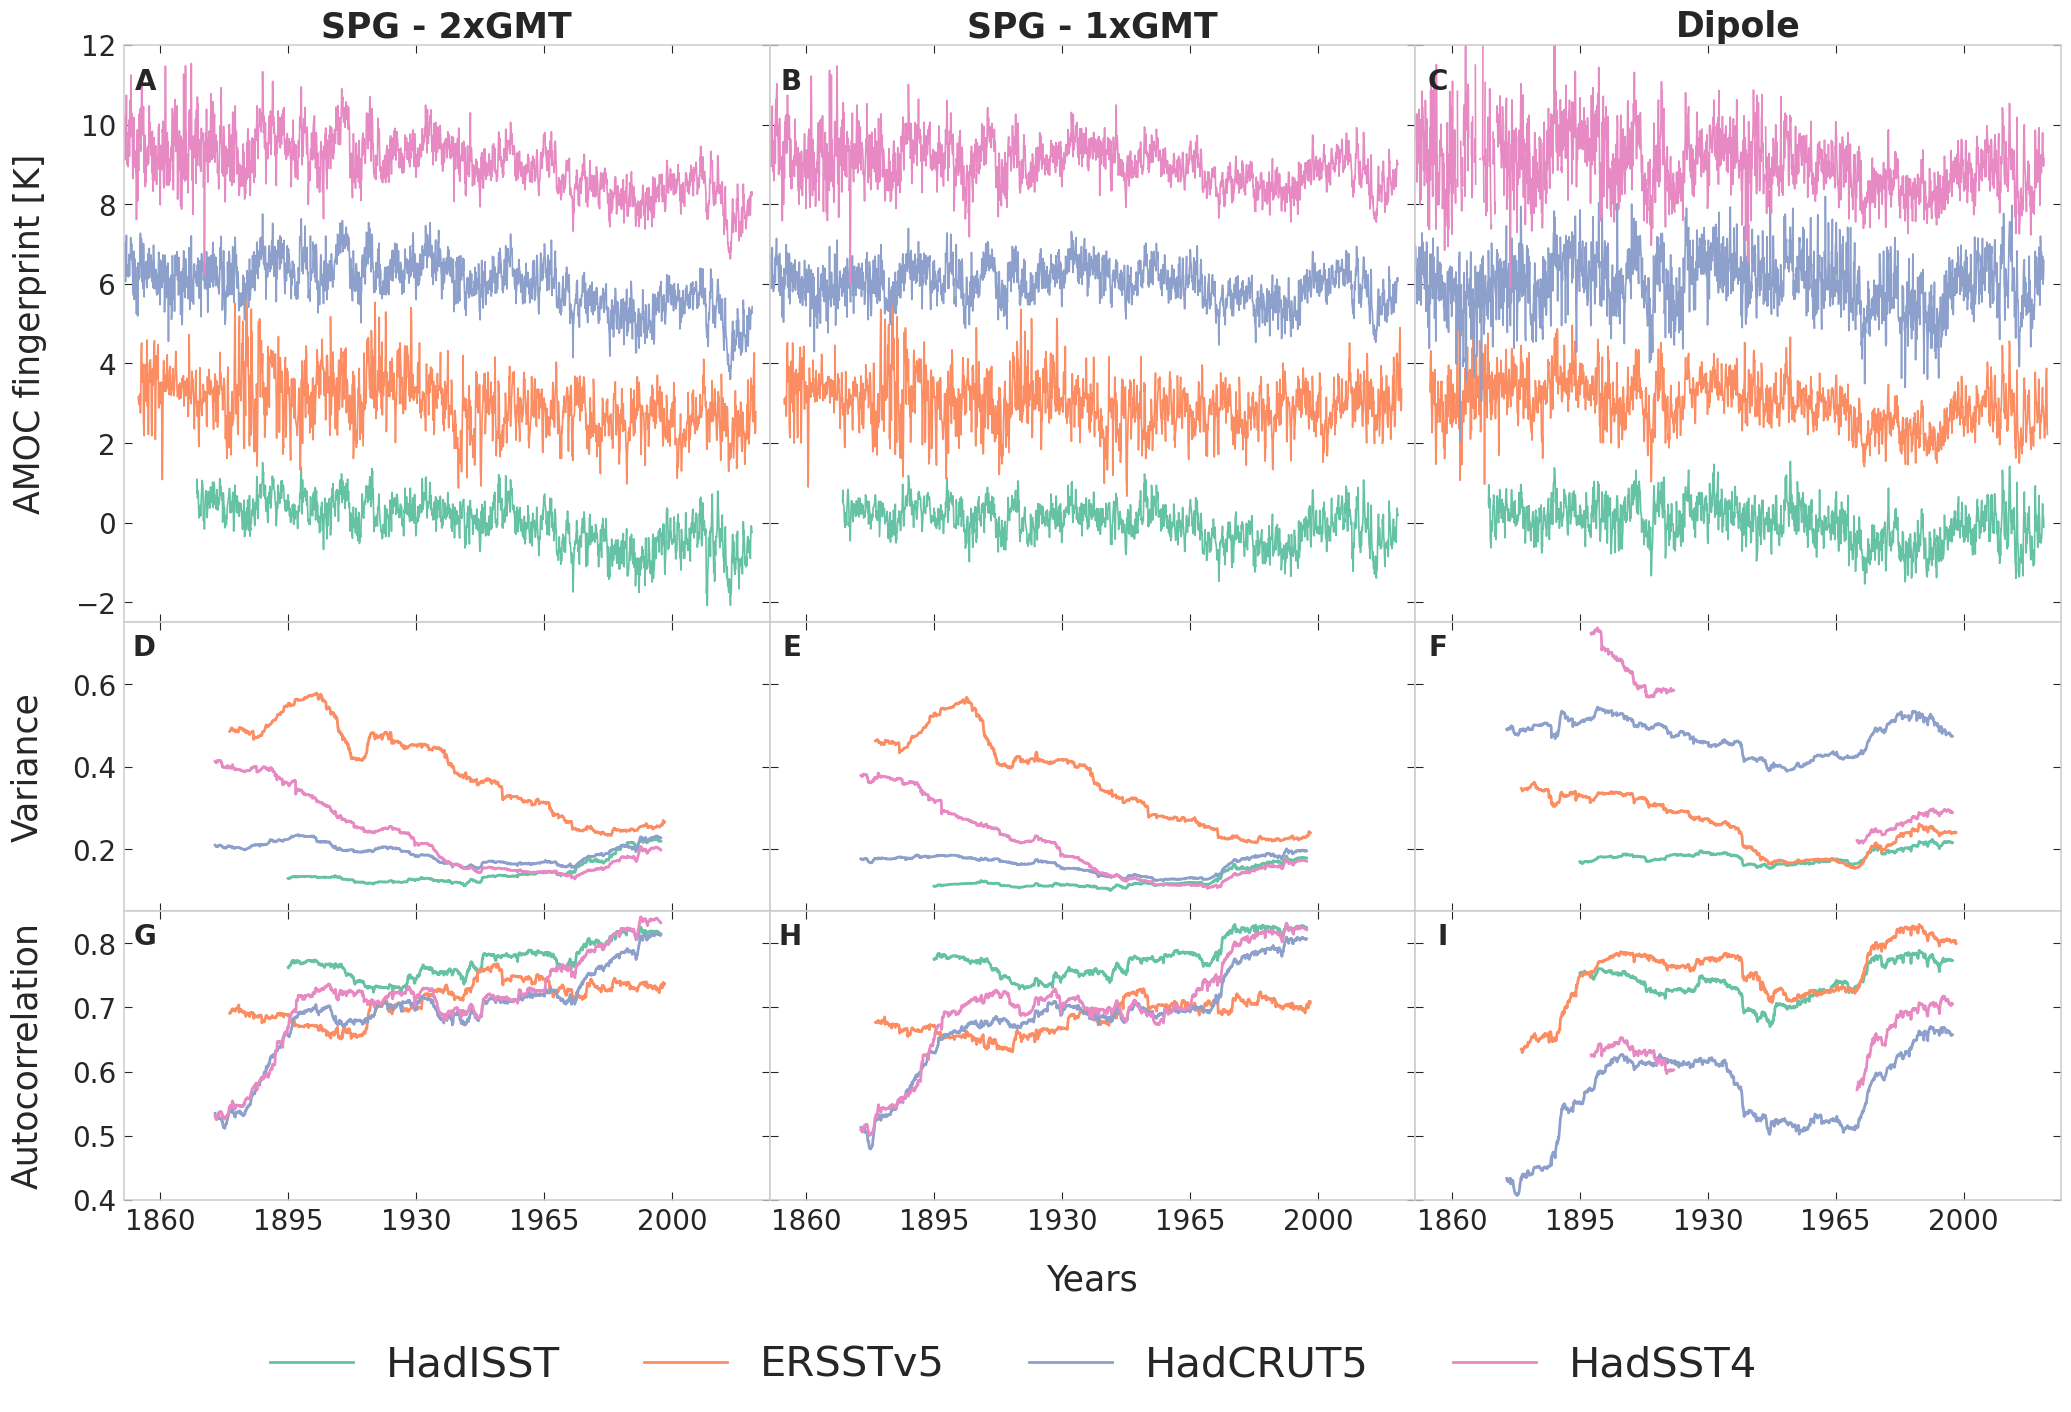

In [14]:
indices = ['C18_2GMT','C18','dipole']
indx_labels=['SPG - 2xGMT','SPG - 1xGMT','Dipole']
colorss = ['C0','C1','C2','C3']
# colorss = ['#a6cee3','#1f78b4','#b2df8a','#33a02c']
colorss = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
tt = np.arange(0,2076)
ttx = np.arange(0,3120)
timess = [tt[20*12:-12],tt[4*12:],tt[:-12],tt[:-12]]
timessx = [ttx[20*12:],ttx[4*12:],ttx[:],ttx[:]]
fig = plt.figure(figsize=(25,15))
lblsize =18
gs = fig.add_gridspec(nrows=3, ncols=3,height_ratios=(2,1,1))

for i, index in enumerate(indices):
    ax1 = fig.add_subplot(gs[0,i])
    ax2 = fig.add_subplot(gs[1,i])
    ax3 = fig.add_subplot(gs[2,i])

    for j, dataset in enumerate(datasets):
        amoc = xr.open_dataset('TT_fingerprints/final/{}_{}.nc'.format(dataset,index))[key_dict[dataset]]
        
        ax1.plot(timess[j],amoc-np.nanmean(amoc)+3*j,color=colorss[j])
        ax1.set_ylim(-2.5,12)
        EWS = xr.open_dataset('TT_EWS/{}_{}_EWSfit_ldtrnd_ydt_w50.nc'.format(dataset,index))
        ax2.plot(timess[j],EWS['var'],color=colorss[j],lw=2,label=dataset)
        
        ax3.plot(timess[j],EWS['ar1'],color=colorss[j],lw=2)
                
        p = EWS.params.values
        Tw= p[0]
        tt2 = timessx[j]
        xx = np.arange(0,len(tt2))

    ax2.set_ylim(0.05,0.75)
    ax3.set_ylim(0.4,0.85)
    ax3.set_xlim(0,2120)
    ax2.set_xlim(0,2120)
    ax1.set_xlim(0,2120)
    
    ax2.set_yticks([0.2,0.4,0.6])

    tickss = np.arange(10,180,35)
    ax1.set_xticks(tickss*12)
    ax2.set_xticks(tickss*12)
    ax3.set_xticks(tickss*12)
    ax3.set_xticklabels(tickss+1850,fontsize=20)
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])


    if i!=0:
        ax1.set_yticklabels([])
        ax2.set_yticklabels([])
        ax3.set_yticklabels([])

    else:
        ax1.set_ylabel('AMOC fingerprint [K]',fontsize=25,labelpad=20)
        ax2.set_ylabel('Variance',fontsize=25,labelpad=20)
        ax3.set_ylabel('Autocorrelation',fontsize=25,labelpad=20)

        ax1.tick_params(axis='y',labelsize=20)
        ax2.tick_params(axis='y',labelsize=20)
        ax3.tick_params(axis='y',labelsize=20)
        
    if i==1:
        ax3.set_xlabel('Years',fontsize=25,labelpad=20)
        
    ax1.text(0.05,0.96,labels[i],transform=ax1.transAxes, fontweight='bold',va='top', ha='right',fontsize=20)
    ax2.text(0.05,0.96,labels[i+3],transform=ax2.transAxes,fontweight='bold', va='top', ha='right',fontsize=20)
    ax3.text(0.05,0.96,labels[i+6],transform=ax3.transAxes,fontweight='bold', va='top', ha='right',fontsize=20)

    ax1.set_title(indx_labels[i],fontsize=25,fontweight='bold')
ax2.legend(bbox_to_anchor=(-1.8, -1.7), loc='lower left', borderaxespad=0., fontsize=30,fancybox=False,frameon=False,ncol=4)
fig.subplots_adjust(hspace=0,wspace=0)

plt.show()

# Figure 4

In [11]:
df = pd.read_csv('TT_EWS/EstimMatrix_p0.txt',index_col=0)
TT_p0 = df['tc']
df = pd.read_csv('TT_EWS/EstimMatrix_popt.txt',index_col=0)
TT_popt = df['tc']
df1 = pd.read_csv('TT_EWS/EstimMatrix_C18_2GMT_ens_p0.txt',index_col=0)
df2 = pd.read_csv('TT_EWS/EstimMatrix_C18_ens_p0.txt',index_col=0)
df3 = pd.read_csv('TT_EWS/EstimMatrix_dipole_ens_p0.txt',index_col=0)

tc3 = df3['tc'].values
tc3[np.where(tc3>10000)]=np.nan

TT_ens_p0_array = np.array([df1['tc'].values,df2['tc'].values,tc3])
TT_ens_p0_list = [df1['tc'].values,df2['tc'].values,tc3[~np.isnan(tc3)]]

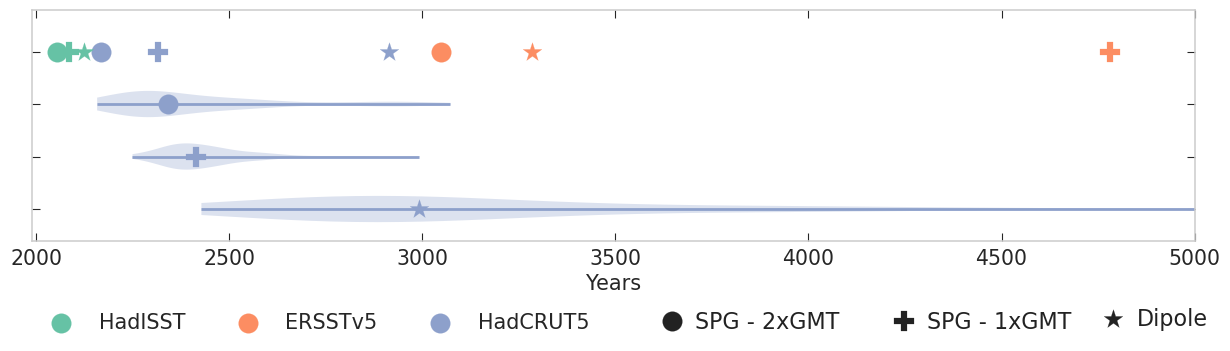

In [13]:
fig = plt.figure(figsize=(15,3))
markers = ['o','P','*']
indices = ['C18_2GMT','C18','dipole']
indx_labels=['SPG - 2xGMT','SPG - 1xGMT','Dipole']
colorss = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
lblsize =18
ax=  fig.add_subplot(111)
for i, index in enumerate(indices):
    for j, dataset in enumerate(datasets[:-1]):
        if i==0:
            ax.scatter(TT_p0[i*3+j],1,color=colorss[j],marker=markers[i],s=200,label=dataset)
        else:
            ax.scatter(TT_p0[i*3+j],1,color=colorss[j],marker=markers[i],s=200)

# p0 violins
poss = [0,-1,-2]            
parts = ax.violinplot(TT_ens_p0_list,poss, vert=False,showextrema=False)
for pc in parts['bodies']:
    pc.set_facecolor(colorss[2])
quartile1, medians, quartile3 = np.nanpercentile(TT_ens_p0_array, [25, 50, 75],axis=1)

for i, med in enumerate(medians):
    ax.scatter(med,poss[i], marker=markers[i], color=colorss[2], s=200, zorder=3)
ax.hlines(poss,np.nanmin(TT_ens_p0_array,axis=1),np.nanmax(TT_ens_p0_array,axis=1), color=colorss[2], linestyle='-', lw=2)

ax.scatter(0.75,-0.35,marker='P',color='k',transform=ax.transAxes,clip_on=False,s=200)
ax.text(0.77,-0.38,indx_labels[1],color='k',transform=ax.transAxes)
ax.scatter(0.55,-0.35,marker='o',color='k',transform=ax.transAxes,clip_on=False,s=200)
ax.text(0.57,-0.38,indx_labels[0],color='k',transform=ax.transAxes)
ax.scatter(0.93,-0.34,marker='*',color='k',transform=ax.transAxes,clip_on=False,s=200)
ax.text(0.95,-0.37,indx_labels[2],color='k',transform=ax.transAxes)

ax.legend(bbox_to_anchor=(0, -0.435), loc='lower left', borderaxespad=0., fontsize=15,fancybox=False,frameon=False,ncol=3)
ax.set_ylim(-2.6,1.8)
ax.set_xlim(1990,5000)
ax.set_xlabel('Years',fontsize=15)
ax.set_yticks(np.arange(-2,2))
ax.set_yticklabels(['','','',''])

plt.show()